In [1]:
import sklearn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic_df = pd.read_csv('datasets/titanic-train.csv')
titanic_df.shape

(891, 12)

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)

In [5]:
titanic_df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
692,1,3,male,NaN,0,0,56.4958,S
1,1,1,female,38.0,1,0,71.2833,C
178,0,2,male,30.0,0,0,13.0000,S
671,0,1,male,31.0,1,0,52.0000,S
23,1,1,male,28.0,0,0,35.5000,S
2,1,3,female,26.0,0,0,7.9250,S
150,0,2,male,51.0,0,0,12.5250,S
110,0,1,male,47.0,0,0,52.0000,S
624,0,3,male,21.0,0,0,16.1000,S
86,0,3,male,16.0,1,3,34.3750,S


In [6]:
titanic_df = titanic_df.dropna()

In [7]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Text(0, 0.5, 'Survived')

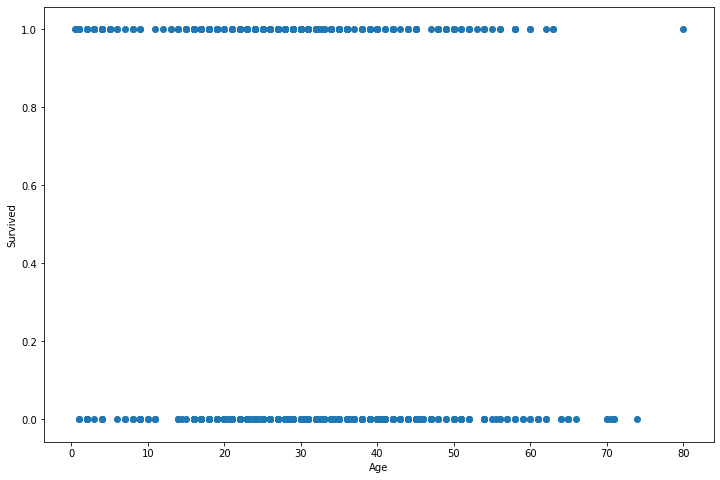

In [8]:
fix,ax = plt.subplots(figsize=(12,8))
plt.scatter(titanic_df['Age'], titanic_df['Survived'])

plt.xlabel('Age')
plt.ylabel('Survived')

In [9]:
pd.crosstab(titanic_df['Sex'], titanic_df['Survived'])

Survived,0,1
Sex,,
female,64,195
male,360,93


In [10]:
pd.crosstab(titanic_df['Pclass'], titanic_df['Survived'])

Survived,0,1
Pclass,,
1,64,120
2,90,83
3,270,85


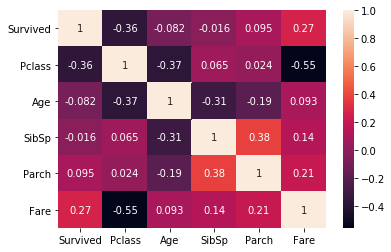

In [11]:
titanic_data_corr = titanic_df.corr()
sns.heatmap(titanic_data_corr, annot=True)

In [12]:
from sklearn import preprocessing

label_encoding = preprocessing.LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'])

titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [13]:
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [14]:
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,1,1,45.0,1,0,83.4750,0,0,1
1,0,3,1,42.0,0,1,8.4042,0,0,1
2,1,3,1,1.0,1,2,20.5750,0,0,1
3,0,3,1,23.5,0,0,7.2292,1,0,0
4,1,3,1,27.0,0,0,8.6625,0,0,1
...,...,...,...,...,...,...,...,...,...,...
707,0,2,1,18.0,0,0,11.5000,0,0,1
708,0,3,1,19.0,0,0,8.1583,0,0,1
709,0,3,1,18.0,0,0,8.3000,0,0,1
710,0,3,1,17.0,0,0,7.1250,0,0,1


In [15]:
titanic_df.to_csv('datasets/titanic_processed.csv', index=False)

In [16]:
from sklearn.model_selection import train_test_split

X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
from sklearn.linear_model import LogisticRegression

logistic_model=LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [18]:
y_pred = logistic_model.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score

In [20]:
acc = accuracy_score(y_test, y_pred) 
prec = precision_score(y_test, y_pred) 
rec = recall_score(y_test, y_pred)

print('accuracy score: ', acc)
print('precision score: ', prec)
print('recall score: ', rec)

accuracy score:  0.7692307692307693
precision score:  0.6949152542372882
recall score:  0.7321428571428571
